In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl    
from pandas import DataFrame


fig = plt.figure()
from numpy.random import randn


<Figure size 432x288 with 0 Axes>

In [ ]:
so = pd.read_csv('/content/drive/My Drive/소통형도서관_프로젝트/자료/대출목록.csv',sep="," )
best = pd.read_csv('/content/drive/My Drive/소통형도서관_프로젝트/자료/베스트_이용도서.csv',sep=",")

In [ ]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.8
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 132681 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=15).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


In [ ]:
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
upper5_loc = upper5.loc[[0, 2, 5, 6]]
upper5_loc

NameError: ignored

#지난 2018-06-01 ~ 2019-09-30 까지의 대출데이터

In [ ]:
so.head(4)

,학과,등록번호,청구기호,서명,저자,대출일
0,간호학과,569943,158.2 하69ㅍKㄱ,대화기술: 생각을 전하고 마음을 사로잡는 기술,하이브로 무사시,20180710
1,간호학과,594738,910.41 한49ㅂ 2007,바람의 딸 걸어서 지구 세바퀴 반,한비야,20180801
2,간호학과,587517,181.2184 맹71시,孟子論,신동준,20180601
3,간호학과,604495,320.1 M149pKㅅ,(가장 정직한 정치 교과서) 군주론,신재일,20180604


In [ ]:
so.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29951 entries, 0 to 29950
Data columns (total 6 columns):
학과      29951 non-null object
등록번호    29951 non-null object
청구기호    29951 non-null object
서명      29951 non-null object
저자      29907 non-null object
대출일     29951 non-null object
dtypes: object(6)
memory usage: 1.4+ MB


In [ ]:
so_1 = so.iloc[:, :]
so_2 = so.loc[:,['학과','청구기호','서명','대출일']]
so_2.info(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29951 entries, 0 to 29950
Data columns (total 4 columns):
학과      29951 non-null object
청구기호    29951 non-null object
서명      29951 non-null object
대출일     29951 non-null object
dtypes: object(4)
memory usage: 936.1+ KB


##공과대학 대여권수

In [ ]:
so_eg = so_2[so_2['학과'].isin(['산업경영공학과','컴퓨터공학과','정보통신공학과','멀티미디어공학전공','멀티미디어학부','멀티미디어영상전공',
                                   '토목·건축공학부','미디어영상전공','전기전자공학과' ,'건축공학전공',
                                   '토목환경공학전공','기계공학과','화학공학과','컴퓨터무인통신기술학과'])]

#신규인'신소재공학과','스마트융합공학부'제외 , 재학생이 없을것으로 판단 '공학교육 혁신센터 제외'
so_eg.shape

(1344, 4)

##사범대학 대여권수

In [ ]:
so_edu = so_2[so_2['학과'].isin(['국어교육과','영어교육과','교육학과','역사교육과','미술교육과','수학교육과'])]
#교육연수원, 교직부 제외
so_edu.shape

(2976, 4)

##문과대학 대여권수

In [ ]:
so_la =  so_2[so_2['학과'].isin(['국어국문·창작학과','영어영문학과','외국어문학부','일어일문학전공','프랑스어문학전공',
                                    '문헌정보학과','사학과','기독교학과','인문학부 철학상담학전공','일본·프랑스어문학과'])]
so_la.shape

(4758, 4)

##경상대학 대여권수

In [ ]:
so_ec =  so_2[so_2['학과'].isin(['경영학과','회계학과','무역학과','경제학부','경제학전공',
                                    '중국경제통상학전공','컨벤션호텔경영학과','비즈니스통계학과'])]
#방촌국제화 훈련단 제외
so_ec.shape

(2395, 4)

##법정대학 대여권수

In [ ]:
so_ss =  so_2[so_2['학과'].isin(['법학부','행정·경찰학부' '행정학전공','경찰학전공 모집전공','정치·언론학과' ,'사회복지학과','아동복지학과','도시부동산학과'])]
so_ss.shape

(1778, 4)

##생명나노과학대학 대여권수

In [ ]:
so_ls =  so_2[so_2['학과'].isin(['생명시스템과학과' ,'식품영양학과','화학과' ,'수학과','간호학과','스포츠과학과','화공신소재공학과'])]
so_ls.shape

(2525, 4)

##사회적경제융합대학 대여권수

In [ ]:
so_se =  so_2[so_2['학과'].isin(['사회복지학과','아동복지학과'])]
                               
#상담심리학과 , 사회적경제기업학과 , 빅데이터응용학과 신규 생성학과 제외
so_se.shape

(820, 4)

##린튼글로벌비지니스 대여권수

In [ ]:
so_gb =  so_2[so_2['학과'].isin(['글로벌비즈니스전공','글로벌IT경영전공'])]
so_gb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
학과      0 non-null object
청구기호    0 non-null object
서명      0 non-null object
대출일     0 non-null object
dtypes: object(4)
memory usage: 0.0+ bytes


##조형예술학부 대여권수

In [ ]:
so_art =  so_2[so_2['학과'].isin(['조형예술학부','융합디자인전공','회화전공','의류학전공'])]
so_art.shape

(860, 4)

##자유전공학부 대여권수

In [ ]:
so_free =  so_2[so_2['학과'].isin(['자유전공학부'])]
so_free.shape

(60, 4)

1)so_eg #공과대

2)so_edu #사범대

3)so_la #문과대

4)so_ec #경상대학

5)so_ss #법정대학

6)so_ls #생명나노대학

7)so_se #사회적경제융합대학

8)so_gb #린튼글로벌비지니스 - 값이 없음 

9)so_art #조형예술학부

10)so_free #자유전공학부


In [ ]:
so_2.tail(6) 

,학과,청구기호,서명,대출일
29945,LINC+사업단,621.381 허14ㅇ,아두이노(Arduino) 상상을 스케치하다,20190823
29946,LINC+사업단,621.381 서39아ㄷ,(한 권으로 끝내는) 아두이노 : 입문 + 실전(종합편) : 기초부터 수준 높은 프...,20190823
29947,LINC+사업단,621.381 아227 2014-7,(스마트폰으로 제어하는) 아두이노,20190823
29948,LINC+사업단,364.153 성8456,성폭력 뒤집기 한국성폭력상담소 20년의 회고와 전망,20190715
29949,LINC+사업단,364.153 모73ㅂKㅂ,"부장님, 그건 성희롱입니다",20190715
29950,LINC+사업단,364.153 심64ㅇ,위험사회와 성폭력 = Sexual violence in a risk society,20190715


위 결과에 등장하듯 링크사업단이나 신규모집 학과, 학생이 소속하지 않은 대학부, 다전공으로 이루어진 DH-SCHOOL 등등

실질적 홍보대상이 아닌 대상은 분석에서 제외 

In [ ]:
from pandas import DataFrame
so_maj = pd.concat([so_eg,so_edu,so_la,so_ec ,so_ss,so_ls , so_se,so_gb , so_art, so_free] )
so_maj1=so_maj.reset_index()
so_maj1

,index,학과,청구기호,서명,대출일
0,1977,기계공학과,629.892 T877r,Robot analysis : the mechanics of serial and p...,20180816
1,1978,기계공학과,910 시15j v.4,홋카이도= Hokkaido,20181224
2,1979,기계공학과,823.54 R884qKㅊ,퀴디치의 역사,20180921
3,1980,기계공학과,895.636 촌51ㄴKㅇ,상실의 시대,20180720
4,1981,기계공학과,621.3747 원55ㅇ,(초심자를 위한)오실로스코프,20180917
...,...,...,...,...,...
17511,27588,자유전공학부,355.2232 대71r,(에듀윌) ROTC·학사장교 : 한권끝장 PACK,20190724
17512,27589,자유전공학부,403.028 국635,국어사전학 개론,20190911
17513,27590,자유전공학부,403.028 유94ㅎ,한국어사전 편찬학 개론 : 사전 편찬의 이론과 실제,20190911
17514,27591,자유전공학부,398.20951 오73ㅎ,(다문화사회에서의) 한국의 옛이야기와 문화교육 : 외국인 유학생을 위한 한국어 교육,20190911


전체 29951권에서 실질적으로 재학생이 빌려간 권수는 17516권 뿐임을 알 수 있다.

#빈도그리기 시작 

>>전체 단과대


In [ ]:
so_maj1.청구기호 = so_maj1.청구기호.str.slice(0, 3)
so_maj1.대출일 = so_maj1.대출일.str.slice(4, 6)

so_ls.청구기호 = so_ls.청구기호.str.slice(0, 3)
so_ls.대출일 = so_ls.대출일.str.slice(4, 6)

so_se.청구기호 = so_se.청구기호.str.slice(0, 3)
so_se.대출일 = so_se.대출일.str.slice(4, 6)

so_art.청구기호 = so_art.청구기호.str.slice(0, 3)
so_art.대출일 = so_art.대출일.str.slice(4, 6)

so_free.청구기호 = so_free.청구기호.str.slice(0, 3)
so_free.대출일 = so_free.대출일.str.slice(4, 6)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
cso_maj2 =so_maj1.drop(['index', '학과','서명'], axis=1)
cso_ls =so_ls.drop(['학과','서명'], axis=1)
cso_se =so_se.drop(['학과','서명'], axis=1)
cso_art=so_art.drop(['학과','서명'], axis=1)
cso_free =so_free.drop(['학과','서명'], axis=1)

In [ ]:
so_art.head(3)

,학과,청구기호,서명,대출일
8203,조형예술학부,745,디자인技法講座,11
8204,조형예술학부,745,디자인技法講座,11
8205,조형예술학부,707,디자인과 형태 : 바우하우스와 그 이후의 기초과정,10


In [ ]:
cso_free.shape

(60, 2)

In [ ]:
cso_maj2 ['청구기호']= cso_maj2 ['청구기호'].astype('int')
cso_maj2 ['대출일'] = cso_maj2 ['대출일'].astype('int')

cso_ls ['청구기호']= cso_ls['청구기호'].astype('int')
cso_ls ['대출일'] = cso_ls['대출일'].astype('int')

cso_se ['청구기호']= cso_se ['청구기호'].astype('int')
cso_se['대출일'] = cso_se['대출일'].astype('int')

cso_art['청구기호']= cso_art['청구기호'].astype('int')
cso_art['대출일'] = cso_art['대출일'].astype('int')

cso_free ['청구기호']= cso_free ['청구기호'].astype('int')
cso_free ['대출일'] = cso_free ['대출일'].astype('int')

In [ ]:
cso_maj2 .

,청구기호,대출일
0,629,8
1,910,12
2,823,9
3,895,7
4,621,9
...,...,...
17511,355,7
17512,403,9
17513,403,9
17514,398,9


#전체 단과대 계절별 빈도

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_te

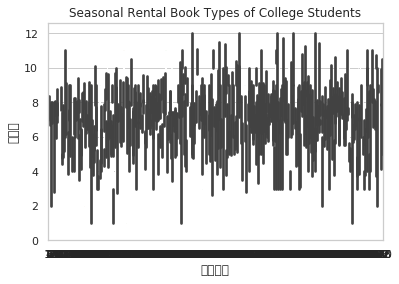

In [ ]:
#전체 단과대 합산 
sns.set_style("whitegrid")
sns.barplot(x="청구기호", y="대출일", data=cso_maj2 )
plt.title("Seasonal Rental Book Types of College Students")
plt.show()


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

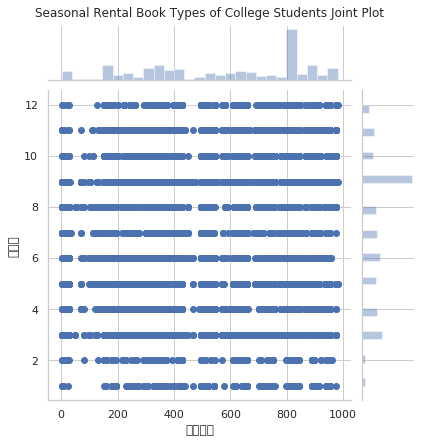

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=cso_maj2 )
plt.suptitle("Seasonal Rental Book Types of College Students Joint Plot", y=1.02)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

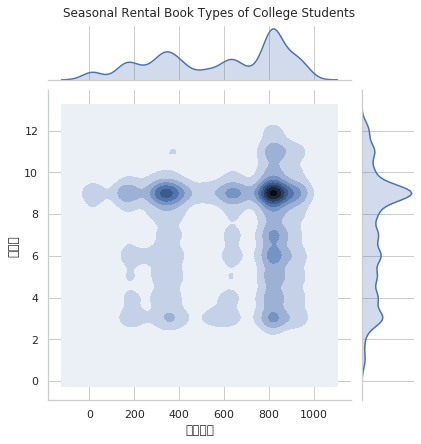

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=cso_maj2, kind="kde")
plt.suptitle("Seasonal Rental Book Types of College Students", y=1.02)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

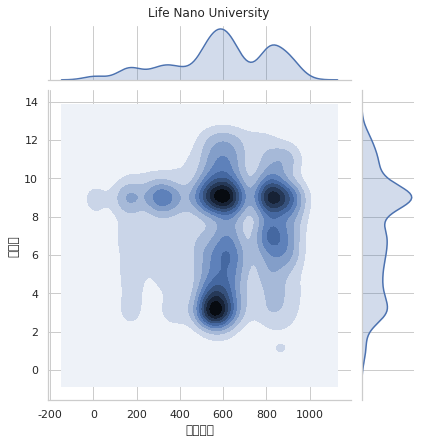

In [ ]:

sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=cso_ls, kind="kde")
plt.suptitle("Life Nano University", y=1.02)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

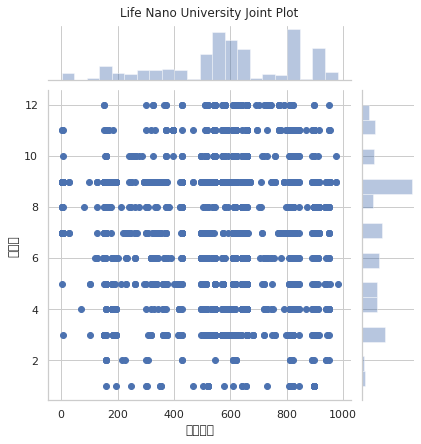

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=cso_ls)
plt.suptitle("Life Nano University Joint Plot", y=1.02)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

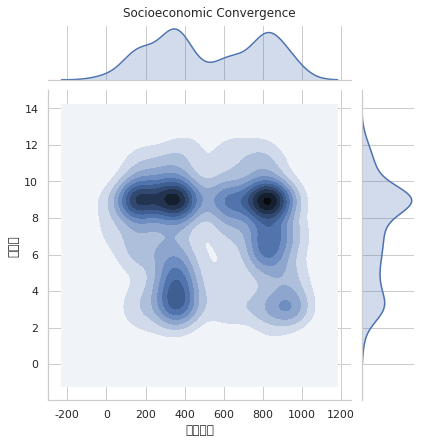

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=cso_se, kind="kde")
plt.suptitle("Socioeconomic Convergence", y=1.02)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

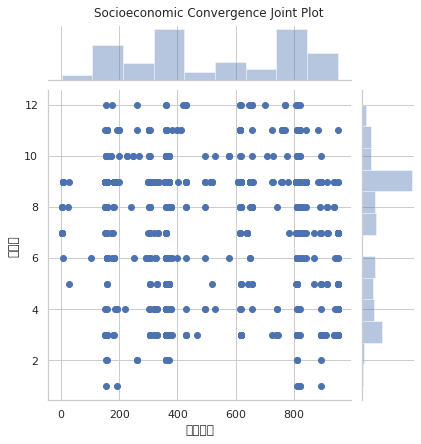

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=cso_se)
plt.suptitle("Socioeconomic Convergence Joint Plot", y=1.02)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

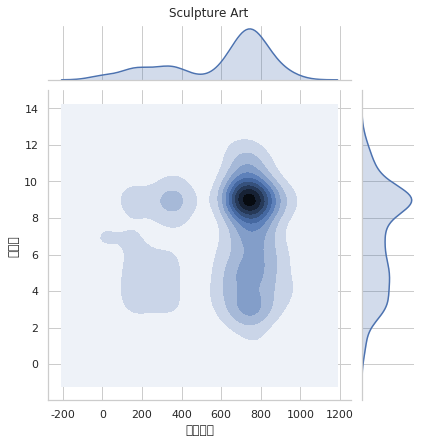

In [ ]:

sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=cso_art, kind="kde")
plt.suptitle("Sculpture Art", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=cso_se)
plt.suptitle("Socioeconomic Convergence Joint Plot", y=1.02)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

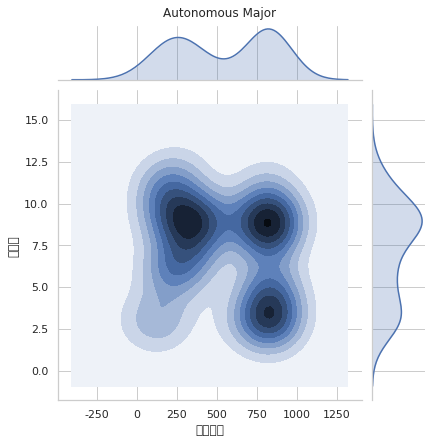

In [ ]:

sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=cso_free, kind="kde")
plt.suptitle("Autonomous Major", y=1.02)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

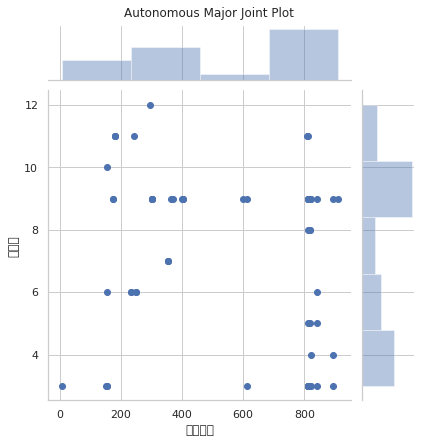

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=cso_free )
plt.suptitle("Autonomous Major Joint Plot", y=1.02)
plt.show()

In [ ]:
so_edu.head(5)

,학과,청구기호,서명,대출일
785,교육학과,813.6 계66ㅂ,별을 헨다 ; 創作集,20180907
786,교육학과,370.193 R363sKㄱ,人間없는 학교,20180906
787,교육학과,813.6 최695과,廣場,20181113
788,교육학과,720.951 류14ㅇ,우리 옛 건축에 담긴 표정들,20181031
789,교육학과,891.733 N117ℓKㄱ,롤리타,20181129


In [ ]:
del so_maj1['index']

In [ ]:
so_maj1.head(5)

,학과,청구기호,서명,대출일
0,기계공학과,629.892 T877r,Robot analysis : the mechanics of serial and p...,20180816
1,기계공학과,910 시15j v.4,홋카이도= Hokkaido,20181224
2,기계공학과,823.54 R884qKㅊ,퀴디치의 역사,20180921
3,기계공학과,895.636 촌51ㄴKㅇ,상실의 시대,20180720
4,기계공학과,621.3747 원55ㅇ,(초심자를 위한)오실로스코프,20180917


In [ ]:
so_maj2 = so_maj1.drop_duplicates(['서명'],keep = False)
so_maj2.shape

(7023, 4)

In [ ]:
import numpy as np
import pandas as pd
#데이터 프레임 리스트로 변환
#무쓸모 안됌 ㅋ

def mkRefdS(pre, roundN):
    re=[pre.loc[i, j] for i in pre.index for j in pre.columns]
    return(np.round(re, roundN))

In [ ]:
print(type(so_maj1['서명']))

<class 'pandas.core.series.Series'>


In [ ]:
so_maj_book =so_maj1['서명'].tolist() # 특정 열만 리스트로 출력 

In [ ]:
so_maj1['서명'].shape

(17516,)

In [ ]:
so_bodu= {}
lists= so_maj_book
for lst in lists:
    try: do_bodu[lst]+= 1
    except: so_bodu[lst]=1
so_bodu
#리스트안의 중복된 값 개수확인

{'Robot analysis : the mechanics of serial and parallel manipulators': 1,
 '홋카이도=    Hokkaido': 1,
 '퀴디치의 역사': 1,
 '상실의 시대': 1,
 '(초심자를 위한)오실로스코프': 1,
 '부자아빠의 진실게임': 1,
 'ANSYS Workbench 왕초보 탈출하기': 1,
 '내 자아를 버려라': 1,
 '대한민국 20대, 펀드투자에 미쳐라': 1,
 '군주론': 1,
 '일 잘하는 사람 일 못하는 사람': 1,
 '내연기관': 1,
 '난장이가 쏘아올린 작은 공 : 조세희 소설집': 1,
 '(매트 리들리의) 붉은 여왕': 1,
 '매트랩 개요와 응용': 1,
 '(리빙토픽) 영양과 식생활': 1,
 '예수님처럼': 1,
 '돈 버는 사람은 분명 따로 있다': 1,
 '물은 답을 알고 있다': 1,
 '流體力學演習': 1,
 '신비한 동물사전': 1,
 '자동차공학개론 : 기초에서부터 새로운 시스템까지': 1,
 'CNC 프로그래밍 ＆ 가공기술': 1,
 '정상의 법칙 : 정상에 앉아 있는 사람은 뭔가 특별한 삶의 원리가 있다': 1,
 '(아하!) 물리수학': 1,
 '주거의 문화적 의미': 1,
 '파인만 씨, 농담도 잘하시네. 2': 1,
 '유체기계': 1,
 '유한요소 해석의 기초': 1,
 '먹어라 그렇지 않으면 먹힌다': 1,
 '(최신) KS 규격데이터북': 1,
 'Start with no = 상대방을 사로잡는 협상의 기술 /   노로 시작하라': 1,
 '내면세계의 질서와 영적성장': 1,
 '(Visual C++ 2008) MFC 윈도우 프로그래밍': 1,
 '고급영양학=    Advanced nutrition': 1,
 '사람풍경: 김형경 심리 여행 에세이': 1,
 '브루투스의 심장: 완전범죄 살인 릴레이': 1,
 '나는 희망의 증거가 되고 싶다 : 가발공장에서 하버드까지': 1,
 '비즈니스 협상론': 1,
 '자동차공학개론': 1,
 '(허브 코

In [ ]:
so_book_bin = so_maj1.groupby(['서명']).size().reset_index()
so_book_bin.rename(columns = {0: '빈도'}, inplace = True)

so_book_bin.tail(15)

#서명의 중복행을 제거하고 서명의 빈도를 계산

,서명,빈도
10149,히치콕과의 대화,1
10150,힐 하우스의 유령 : 차가운 공포와의 숨막히는 포옹,1
10151,金融國際化의 當面課題와 政策方向,1
10152,金融機關經營,17
10153,不法行爲論,1
10154,女性과 社會,3
10155,歷史,3
10156,歷史 앞에서 : 한 사학자의 6·25일기,1
10157,歷史學 槪論 : 歷史와 歷史學,2
10158,柳一韓 : 나라 사랑의 참 企業人,1


In [ ]:
#빈도 그래프를 그려보자

import numpy as np
import pandas as pd
from pandas import DataFrame

https://m.blog.naver.com/PostView.nhn?blogId=nonamed0000&logNo=220917041986&proxyReferer=https%3A%2F%2Fwww.google.com%2F
  
  
  다음시간에 이어서 책서명으로 빈도표 그리기

In [ ]:
#대출기록 빈도로 내림차순 정렬
so_book_bin.sort_values(by = ['빈도'],ascending = False)

,서명,빈도
3260,군주론,47
6805,어린왕자,42
6956,역사란 무엇인가,39
8146,정령왕 엘퀴네스: 이환 판타지 장편소설,34
1939,7년의 밤 정유정 장편소설,30
...,...,...
3893,노박씨 이야기,1
3890,노동법 개별적 근로관계법 및 집단적 노사관계법 Labor law,1
3889,노동법 = Labour law,1
3888,노년의 의미,1


In [ ]:
so1025 = so_book_bin.sort_values(by = ['빈도'],ascending = False)

In [ ]:
so1025.head(15)

,서명,빈도
3260,군주론,47
6805,어린왕자,42
6956,역사란 무엇인가,39
8146,정령왕 엘퀴네스: 이환 판타지 장편소설,34
1939,7년의 밤 정유정 장편소설,30
4212,대한민국史 : 한홍구의 역사이야기,29
8651,짜라투스트라는 이렇게 말했다,29
9775,해리포터와 마법사의 돌,29
4025,니코마코스 윤리학,27
2754,감시와 처벌 : 감옥의 역사,26


In [ ]:
SO15 = so1025.head(15)

Exception: ignored

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


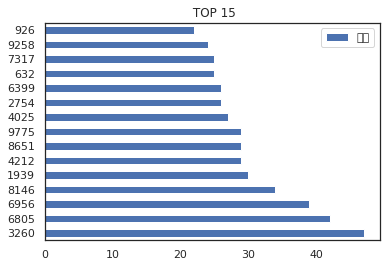

In [ ]:
SO15.plot(kind='barh',title=' TOP 15')


(-0.05, 1.05, -0.05, 1.05)

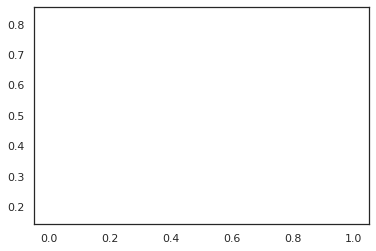

In [ ]:
plt.axis('equal')

In [ ]:
bestb = best.loc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,
                  51,52,53,54,55,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,
                  101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,
                  151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199]]
bestb.tail(5)

,등록번호,서명,청구기호,저자,출판사,출판년도,유형,이용빈도
195,785052,(2018 시나공) 컴퓨터활용능력 : 2급 필기,004.076 길43ㅋ2ㅍ 2018,강윤석,길벗,2017,4.076,9
196,795465,"해커스 토익 LC 실전 1000제 : Listening . 1 , 해설집",428.24076 H118ㅎㅅℓㅎ 2018,해커스 . 어학연구소,해커스 어학연구소,2018,428.24076,9
197,676538,7년의 밤 정유정 장편소설,813.6 정675ㅊ,정유정,은행나무,2011,813.6,9
198,794269,(SPSS) 사회조사분석사 : 2급 실기 : 한권으로 올인하기,300.72076 현57ㅅ 2018,현수영,정훈사,2018,300.72076,9
199,797038,해커스 新토익 보카,428.24076 C545ㅎv 2016,"Cho, David",해커스어학연구소,2016,428.24076,9


In [ ]:
best50 = best.iloc[0:200, :]
best50_3 = best50.loc[:,['서명','이용빈도','유형']]
best50_3.tail(6)

,서명,이용빈도,유형
194,(흥분하지 않고 우아하게 리드하는) 말센스,9,153.6
195,(2018 시나공) 컴퓨터활용능력 : 2급 필기,9,4.076
196,"해커스 토익 LC 실전 1000제 : Listening . 1 , 해설집",9,428.24076
197,7년의 밤 정유정 장편소설,9,813.6
198,(SPSS) 사회조사분석사 : 2급 실기 : 한권으로 올인하기,9,300.72076
199,해커스 新토익 보카,9,428.24076


In [ ]:
best50_3['유형'].astype('float')

0      818.70000
1      895.63600
2      813.70000
3      818.70000
4      813.70000
         ...    
195      4.07600
196    428.24076
197    813.60000
198    300.72076
199    428.24076
Name: 유형, Length: 200, dtype: float64

In [ ]:
print(best50_3[best50_3['서명'].isin(['언어의 온도'])])

         서명  이용빈도     유형
5    언어의 온도    16  818.7
10   언어의 온도    15  818.7
28   언어의 온도    13  818.7
134  언어의 온도     9  818.7


In [ ]:
print(best.loc[0])

등록번호                                         778967
서명      나는 나로 살기로 했다 : 냉담한 현실에서 어른살이를 위한 to do list
청구기호                                     818.7 김57나
저자                                              김수현
출판사                                            마음의숲
출판년도                                           2016
유형                                            818.7
이용빈도                                             20
Name: 0, dtype: object


In [ ]:
best50_3.shape

(200, 3)

#반올림 해버림 ㄷㄷ


In [ ]:
best50_4 = best50.loc[:,['이용빈도','유형']]
best50_4.head(6)

,이용빈도,유형
0,20,818.7
1,20,895.636
2,19,813.7
3,17,818.7
4,16,813.7
5,16,818.7


In [ ]:
best50_5 = best50.loc[:,['이용빈도','유형']]
best50_5.head(6)

,이용빈도,유형
0,20,818.7
1,20,895.636
2,19,813.7
3,17,818.7
4,16,813.7
5,16,818.7


In [ ]:
best50_5['유형']= best50_4['유형'].astype('float')

In [ ]:
best50_5.head(5)

,이용빈도,유형
0,20,819
1,20,896
2,19,814
3,17,819
4,16,814


In [ ]:
best50_5['유형']= best50_4['유형'].astype('float')
best50_5['유형']

0     819
1     896
2     814
3     819
4     814
       ..
195     4
196   428
197   814
198   301
199   428
Name: 유형, Length: 200, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_

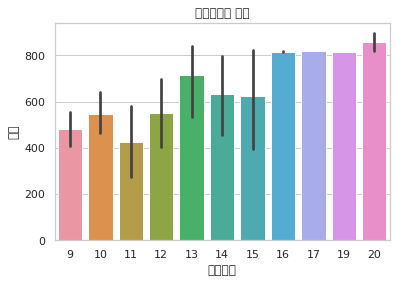

In [ ]:
sns.set_style("whitegrid")
sns.barplot(x="이용빈도", y="유형", data=best50_5)
plt.title("유형빈도별 유형")
plt.show()


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_

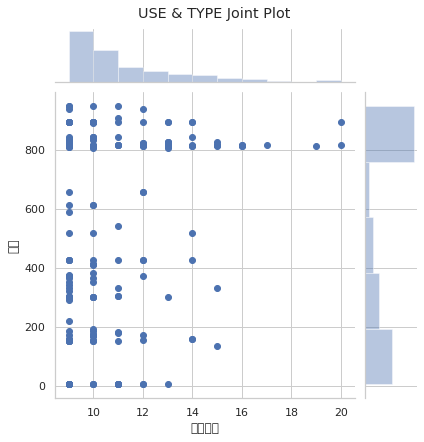

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="이용빈도", y="유형", data=best50_5)
plt.suptitle("USE & TYPE Joint Plot", y=1.02)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_

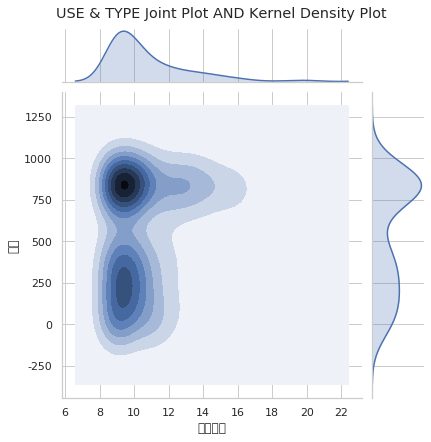

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="이용빈도", y="유형", data=best50_5, kind="kde")
plt.suptitle("USE & TYPE Joint Plot AND Kernel Density Plot", y=1.02)
plt.show()